In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

2차방정식으로 비선형 데이터를 생성

In [37]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X +2 + np.random.randn(m,1)
X

array([[-1.48920565],
       [-0.92582404],
       [-1.9104137 ],
       [ 2.45070337],
       [ 0.50035077],
       [-0.5948915 ],
       [-0.22796518],
       [ 2.68370004],
       [-2.07989158],
       [ 0.51737899],
       [ 0.03533207],
       [ 0.66872541],
       [-2.8913389 ],
       [ 2.23274345],
       [ 2.59270969],
       [ 0.3907991 ],
       [ 1.17990494],
       [ 2.53499629],
       [ 1.24343181],
       [-2.08476574],
       [ 0.45773016],
       [ 0.64029028],
       [-0.45521597],
       [ 1.41866541],
       [ 2.60620209],
       [ 2.55341108],
       [-0.29496377],
       [-2.32057172],
       [ 2.90904719],
       [ 2.03338852],
       [-2.25202391],
       [ 2.5250513 ],
       [ 2.21937817],
       [ 0.11302834],
       [ 0.54765261],
       [-0.60598378],
       [-2.67143017],
       [-0.98881655],
       [ 1.81712069],
       [-2.97220786],
       [-0.99900497],
       [-0.61098784],
       [ 0.22437362],
       [ 2.5191337 ],
       [-0.92192403],
       [-0

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_features

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [40]:
# 원래 X 값과 그 제곱.
X_poly = poly_features.fit_transform(X)
X_poly

array([[-1.48920565e+00,  2.21773346e+00],
       [-9.25824039e-01,  8.57150151e-01],
       [-1.91041370e+00,  3.64968050e+00],
       [ 2.45070337e+00,  6.00594700e+00],
       [ 5.00350769e-01,  2.50350892e-01],
       [-5.94891499e-01,  3.53895896e-01],
       [-2.27965178e-01,  5.19681224e-02],
       [ 2.68370004e+00,  7.20224589e+00],
       [-2.07989158e+00,  4.32594899e+00],
       [ 5.17378992e-01,  2.67681021e-01],
       [ 3.53320733e-02,  1.24835540e-03],
       [ 6.68725413e-01,  4.47193677e-01],
       [-2.89133890e+00,  8.35984062e+00],
       [ 2.23274345e+00,  4.98514333e+00],
       [ 2.59270969e+00,  6.72214356e+00],
       [ 3.90799102e-01,  1.52723938e-01],
       [ 1.17990494e+00,  1.39217568e+00],
       [ 2.53499629e+00,  6.42620618e+00],
       [ 1.24343181e+00,  1.54612266e+00],
       [-2.08476574e+00,  4.34624820e+00],
       [ 4.57730161e-01,  2.09516900e-01],
       [ 6.40290278e-01,  4.09971640e-01],
       [-4.55215972e-01,  2.07221581e-01],
       [ 1.

In [41]:
X[0]

array([-1.48920565])

In [42]:
X_poly[0]

array([-1.48920565,  2.21773346])

In [43]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
lin_reg.intercept_,lin_reg.coef_

(array([1.94414285]), array([[1.03073011, 0.51082943]]))

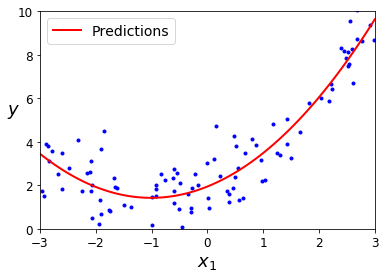

In [45]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()